# CIS 519 HW 2

In [6]:
import pandas as pd

import numpy as np
from numpy import linalg as LA
from numpy.linalg import *

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Linear Regression

In [14]:
# '''
#     Linear Regression via Gradient Descent
# '''

# class LinearRegression:

#     def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
#         '''
#         Constructor
#         '''
#         self.alpha = alpha
#         self.n_iter = n_iter
#         self.theta = init_theta
#         self.JHist = None
    

#     def gradientDescent(self, X, y, theta):
#         '''
#         Fits the model via gradient descent
#         Arguments:
#             X is a n-by-d numpy matrix
#             y is an n-dimensional numpy vector
#             theta is a d-dimensional numpy vector
#         Returns:
#             the final theta found by gradient descent
#         '''
#         n,d = X.shape
#         self.JHist = []
#         for i in range(self.n_iter):
#             self.JHist.append( (self.computeCost(X, y, theta), theta) )
#             print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta.T)
#             yhat = X*theta
#             theta = theta -  (X.T * (yhat - y)) * (self.alpha / n)
#         return theta
    

#     def computeCost(self, X, y, theta):
#         '''
#         Computes the objective function
#         Arguments:
#           X is a n-by-d numpy matrix
#           y is an n-dimensional numpy vector
#           theta is a d-dimensional numpy vector
#         Returns:
#           a scalar value of the cost  
#               ** Not returning a matrix with just one value! **
#         '''
#         n,d = X.shape
#         yhat = X*theta
#         J =  (yhat-y).T * (yhat-y) / n
#         J_scalar = J.tolist()[0][0]  # convert matrix to scalar
#         return J_scalar
    

#     def fit(self, X, y):
#         '''
#         Trains the model
#         Arguments:
#             X is a n-by-d Pandas Dataframe
#             y is an n-dimensional Pandas Series
#         '''
#         n = len(y)
#         X = X.to_numpy()
#         X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term

#         y = y.to_numpy()
#         n,d = X.shape
#         y = y.reshape(n,1)

#         if self.theta is None:
#             self.theta = np.matrix(np.zeros((d,1)))

#         self.theta = self.gradientDescent(X,y,self.theta)   


#     def predict(self, X):
#         '''
#         Used the model to predict values for each instance in X
#         Arguments:
#             X is a n-by-d Pandas DataFrame
#         Returns:
#             an n-dimensional numpy vector of the predictions
#         '''
#         X = X.to_numpy()
#         X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
#         return pd.DataFrame(X*self.theta)

### Test code for linear regression

In [15]:
# def test_linreg(n_iter = 2000):
#   # load the data
#   filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-multivariateData.csv"
#   df = pd.read_csv(filepath, header=None)

#   X = df[df.columns[:-1]]
#   y = df[df.columns[-1]]

#   n,d = X.shape

#   # # Standardize features
#   from sklearn.preprocessing import StandardScaler
#   standardizer = StandardScaler()
#   X = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization

#   # # initialize the model
#   init_theta = np.matrix(np.random.randn((d+1))).T
#   alpha = 0.01

#   # # Train the model
#   lr_model = LinearRegression(init_theta = init_theta, alpha = alpha, n_iter = n_iter)
#   lr_model.fit(X,y)

#   # # Compute the closed form solution
#   X = np.asmatrix(X.to_numpy())
#   X = np.c_[np.ones((n,1)), X]     # Add a row of ones for the bias term
#   y = np.asmatrix(y.to_numpy())
#   n,d = X.shape
#   y = y.reshape(n,1)
#   thetaClosedForm = inv(X.T*X)*X.T*y
#   print("thetaClosedForm: ", thetaClosedForm.T)

# Run the Linear Regression Test

In [122]:
# test_linreg(2000)

# Polynomial Regression

In [19]:
'''
    Template for polynomial regression
'''

import numpy as np
from sklearn.linear_model import RidgeCV

#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree = 1, regLambda = 1E-8, tuneLambda = False, regLambdaValues = None):
        '''
        Constructor
        '''
        #TODO
        self.degree = degree
        self.regLambda = regLambda
        self.JHist = None
        self.theta = None
        self.std = None
        self.mean = None
        self.n_iter = 10000
        self.alpha = 0.01
        self.criteria = 0.001
        self.tuneLambda = tuneLambda
        self.regLambdaValues = regLambdaValues

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
#         n,d = X.shape
#         self.JHist = []
#         for i in range(self.n_iter):
#             self.JHist.append( (self.computeCost(X, y, theta), theta) )
#             print("Iteration: ", i+1, " Cost: ", self.JHist[i][0], " Theta.T: ", theta.T)
#             yhat = X*theta
#             theta = theta -  (X.T * (yhat - y)) * (self.alpha / n)
        
        # initialize a initial dummy difference
        diff = 100
        n,d = X.shape
        self.JHist = []
        count = 0
        # loop until the L2 norm is less than the pre-set criteria
        while diff > self.criteria:
            self.JHist.append( (self.computeCost(X, y, theta), theta))
            print("Iteration: ", count+1, " Cost: ", self.JHist[count][0], " Theta.T: ", theta.T)
            yhat = X * theta
            theta = theta -  (X.T * (yhat - y)) * (self.alpha / n) - (self.alpha * self.regLambda * theta)
            diff = np.linalg.norm( theta - self.JHist[count][1] )
            count = count + 1
        print('The regLambda is: ', self.regLambda)
        return theta
    
    

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** Not returning a matrix with just one value! **
        '''
        n,d = X.shape
        yhat = X*theta
        J =  (yhat-y).T * (yhat-y) / n
        J_scalar = J.tolist()[0][0]  # convert matrix to scalar
        return J_scalar
    
    def polyfeatures(self, X, degree):
        '''
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d data frame, with each column comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 data frame
            degree is a positive integer
        '''
        #TODO
        X_poly = X.copy()
        for d in range(degree-1):
            X_poly = pd.concat([X_poly, X.iloc[:,0] * X_poly.iloc[:, d]], axis = 1)    
        return X_poly
    
    def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-1 data frame
                y is an n-by-1 data frame
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling first
        '''
        #TODO
        n = len(y)
        # convert to polynomial form
        X_poly = self.polyfeatures(X, self.degree)
        # standardization
        self.mean = X_poly.mean()
        self.std = X_poly.std()
        X_poly = (X_poly - self.mean) / self.std
        # append 1s to the first column
        X_poly = X_poly.to_numpy()
        X_poly = np.c_[np.ones((n,1)), X_poly]
        
        y = y.to_numpy()
        n,d = X_poly.shape
        y = y.reshape(n,1)
        
        # check if the tuneLambda is required
        if self.tuneLambda is False:
            self.regLambda = 0
        else:
            # find the best lambda value
            clf = RidgeCV(self.regLambdaValues, cv = 8).fit(X_poly, y)
            self.regLambda = clf.alpha_
            print('clf_alpha_ is: ', clf.alpha_)
            

        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))

        self.theta = self.gradientDescent(X_poly, y, self.theta)   
        
    
    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 data frame
        Returns:
            an n-by-1 data frame of the predictions
        '''
        # TODO
        n,d = X.shape
        X_copy = X.copy()
        # Convert to polynomial form
        X_copy = self.polyfeatures(X_copy, self.degree)
        # standardization
        X_copy = (X_copy - self.mean) / self.std
        X_copy = X_copy.to_numpy()
        X_copy = np.c_[np.ones((n,1)), X_copy]     # Add a row of ones for the bias term
        return pd.DataFrame(X_copy*self.theta)
        
        



In [20]:
# import pandas as pd
# X = pd.DataFrame({'A': [1,2,3,4,5]})
# test_model = PolynomialRegression(degree = 6)
# test_model.polyfeatures(X,6)

# Test Polynomial Regression

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def test_polyreg_univariate():
    '''
        Test polynomial regression
    '''

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw2-polydata.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[:-1]]
    y = df[df.columns[-1]]

    # regression with degree = d
    d = 8
    regLambdaValues = [1e-04, 0.001, 0.003, 0.006, 0.01, 0.03, 0.006, 0.1, 0.3, 0.6, 1, 3, 10]
    tuneLambda = True
    regLambda = 0.01
    degree = d
    model = PolynomialRegression(degree, regLambda, tuneLambda, regLambdaValues)
    model.fit(X, y)
    
    # output predictions
    xpoints = pd.DataFrame(np.linspace(np.max(X), np.min(X), 100))
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

clf_alpha_ is:  0.03
Iteration:  1  Cost:  1263.375  Theta.T:  [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Iteration:  2  Cost:  1232.687611148876  Theta.T:  [[ 0.31625    -0.05619117 -0.07642556 -0.08391091 -0.08715606 -0.08879625
  -0.08971321 -0.09022832 -0.09047198]]
Iteration:  3  Cost:  1203.8723209689224  Theta.T:  [[ 0.62924263 -0.10695814 -0.14694102 -0.16176277 -0.16821447 -0.17150332
  -0.17337009 -0.17444764 -0.1749918 ]]
Iteration:  4  Cost:  1176.7182424725652  Theta.T:  [[ 0.93901143 -0.15269386 -0.21197185 -0.23399028 -0.24361168 -0.24855635
  -0.25140285 -0.25308634 -0.25398345]]
Iteration:  5  Cost:  1151.0426353198905  Theta.T:  [[ 1.24558961 -0.19376313 -0.27191305 -0.30099697 -0.31375289 -0.32035929
  -0.32421278 -0.32654217 -0.32784054]]
Iteration:  6  Cost:  1126.6870392712303  Theta.T:  [[ 1.54901004 -0.23050461 -0.32713133 -0.36315749 -0.37901427 -0.38728718
  -0.39217242 -0.39518436 -0.39692852]]
Iteration:  7  Cost:  1103.513941164715  Theta.T:  [[ 1.84930523 -0.26323268 

Iteration:  253  Cost:  180.64969545781395  Theta.T:  [[28.44396375  2.51406439 -0.27210869 -1.22152879 -1.61463045 -1.84281322
  -2.02115257 -2.18070876 -2.3279018 ]]
Iteration:  254  Cost:  180.47726125847117  Theta.T:  [[28.46724093  2.52363848 -0.27079818 -1.22237899 -1.61602429 -1.8444141
  -2.02295317 -2.18275937 -2.33024103]]
Iteration:  255  Cost:  180.3075536216887  Theta.T:  [[28.49027834  2.53318611 -0.26949981 -1.22323284 -1.61741627 -1.84600925
  -2.02474512 -2.18479903 -2.33256746]]
Iteration:  256  Cost:  180.14052306884815  Theta.T:  [[28.51307848  2.54270736 -0.26821353 -1.22409031 -1.61880641 -1.84759869
  -2.02652845 -2.18682779 -2.33488114]]
Iteration:  257  Cost:  179.97612107612144  Theta.T:  [[28.53564377  2.55220233 -0.26693929 -1.22495139 -1.62019471 -1.84918244
  -2.02830319 -2.18884569 -2.33718212]]
Iteration:  258  Cost:  179.8143000554732  Theta.T:  [[28.55797664  2.56167112 -0.26567705 -1.22581606 -1.62158116 -1.85076052
  -2.03006938 -2.19085277 -2.339470

Iteration:  472  Cost:  168.57189378819936  Theta.T:  [[30.46979778  4.11368312 -0.20584225 -1.47036102 -1.88255607 -2.08627945
  -2.2560689  -2.42935886 -2.60660261]]
Iteration:  473  Cost:  168.557442435698  Theta.T:  [[30.47220887  4.11921079 -0.20629422 -1.47169405 -1.8836342  -2.08701091
  -2.2565865  -2.42980231 -2.60707264]]
Iteration:  474  Cost:  168.54309255228225  Theta.T:  [[30.47459512  4.12472614 -0.20675111 -1.47302819 -1.88471121 -2.08773975
  -2.2571004  -2.4302412  -2.60753741]]
Iteration:  475  Cost:  168.52884299244357  Theta.T:  [[30.47695679  4.13022922 -0.20721289 -1.47436343 -1.8857871  -2.08846599
  -2.25761059 -2.43067553 -2.60799694]]
Iteration:  476  Cost:  168.5146926266043  Theta.T:  [[30.47929413  4.13572007 -0.20767953 -1.47569977 -1.88686188 -2.08918964
  -2.25811711 -2.43110533 -2.60845125]]
Iteration:  477  Cost:  168.50064034085972  Theta.T:  [[30.4816074   4.14119873 -0.20815102 -1.4770372  -1.88793556 -2.0899107
  -2.25861996 -2.43153062 -2.6089003

Iteration:  722  Cost:  166.55692695163927  Theta.T:  [[30.68629343  5.19936428 -0.42797829 -1.82334592 -2.12216821 -2.20705177
  -2.30003632 -2.43662332 -2.6058018 ]]
Iteration:  723  Cost:  166.55202679761962  Theta.T:  [[30.68647461  5.20279589 -0.42916601 -1.82479004 -2.12302237 -2.20734691
  -2.29996503 -2.43635937 -2.60546834]]
Iteration:  724  Cost:  166.5471385561492  Theta.T:  [[30.68665392  5.20622203 -0.43035523 -1.82623413 -2.12387581 -2.20764095
  -2.29989238 -2.43609386 -2.60513316]]
Iteration:  725  Cost:  166.54226215108622  Theta.T:  [[30.68683138  5.20964274 -0.43154593 -1.82767818 -2.12472853 -2.20793389
  -2.29981838 -2.43582681 -2.60479628]]
Iteration:  726  Cost:  166.53739750694703  Theta.T:  [[30.68700702  5.21305801 -0.43273812 -1.82912219 -2.12558053 -2.20822574
  -2.29974303 -2.43555822 -2.60445771]]
Iteration:  727  Cost:  166.53254454889978  Theta.T:  [[30.68718085  5.21646788 -0.43393178 -1.83056615 -2.12643181 -2.2085165
  -2.29966635 -2.43528811 -2.60411

Iteration:  972  Cost:  165.57648824847172  Theta.T:  [[30.70256171  5.92232843 -0.75488966 -2.17803308 -2.31554415 -2.25425305
  -2.25173317 -2.33721685 -2.48655048]]
Iteration:  973  Cost:  165.57322791063407  Theta.T:  [[30.70257533  5.92479054 -0.75626481 -2.17941008 -2.31624441 -2.25435977
  -2.25145486 -2.33673213 -2.48598429]]
Iteration:  974  Cost:  165.5699712195128  Theta.T:  [[30.7025888   5.92724996 -0.75764018 -2.18078665 -2.31694415 -2.25446599
  -2.25117611 -2.336247   -2.48541773]]
Iteration:  975  Cost:  165.566718163284  Theta.T:  [[30.70260214  5.92970669 -0.75901574 -2.18216279 -2.31764335 -2.25457173
  -2.25089691 -2.33576149 -2.48485081]]
Iteration:  976  Cost:  165.56346873019731  Theta.T:  [[30.70261533  5.93216073 -0.76039151 -2.1835385  -2.31834203 -2.25467697
  -2.25061729 -2.33527558 -2.48428354]]
Iteration:  977  Cost:  165.5602229085752  Theta.T:  [[30.7026284   5.93461211 -0.76176747 -2.18491378 -2.31904018 -2.25478172
  -2.25033722 -2.33478929 -2.4837159

Iteration:  1222  Cost:  164.85286836435142  Theta.T:  [[30.70378417  6.46845715 -1.09896713 -2.50742812 -2.47544174 -2.26871393
  -2.17295735 -2.20923578 -2.33997836]]
Iteration:  1223  Cost:  164.85027757275503  Theta.T:  [[30.70378519  6.47040947 -1.10032536 -2.50868158 -2.47602476 -2.26873287
  -2.17261963 -2.208714   -2.33939178]]
Iteration:  1224  Cost:  164.84768881809413  Theta.T:  [[30.70378621  6.47236024 -1.10168332 -2.5099345  -2.47660737 -2.26875157
  -2.17228183 -2.20819225 -2.33880532]]
Iteration:  1225  Cost:  164.84510209699  Theta.T:  [[30.70378721  6.47430948 -1.10304102 -2.51118689 -2.47718955 -2.26877004
  -2.17194394 -2.20767053 -2.33821897]]
Iteration:  1226  Cost:  164.84251740607687  Theta.T:  [[30.7037882   6.47625718 -1.10439846 -2.51243875 -2.47777133 -2.26878825
  -2.17160597 -2.20714884 -2.33763275]]
Iteration:  1227  Cost:  164.83993474200187  Theta.T:  [[30.70378918  6.47820334 -1.10575563 -2.51369008 -2.47835268 -2.26880623
  -2.1712679  -2.20662718 -2.

Iteration:  1472  Cost:  164.261478118794  Theta.T:  [[30.70387603  6.91482136 -1.42837588 -2.80410643 -2.60900477 -2.26723407
  -2.08742788 -2.08162897 -2.1991294 ]]
Iteration:  1473  Cost:  164.2593158568033  Theta.T:  [[30.70387611  6.91645973 -1.42964656 -2.80522606 -2.6094929  -2.26720759
  -2.08708668 -2.08113589 -2.19859564]]
Iteration:  1474  Cost:  164.2571550560039  Theta.T:  [[30.70387618  6.91809706 -1.43091683 -2.80634516 -2.60998069 -2.26718098
  -2.08674552 -2.08064298 -2.19806215]]
Iteration:  1475  Cost:  164.25499571480492  Theta.T:  [[30.70387626  6.91973336 -1.43218669 -2.80746374 -2.61046812 -2.26715424
  -2.0864044  -2.08015024 -2.19752893]]
Iteration:  1476  Cost:  164.2528378316191  Theta.T:  [[30.70387633  6.92136863 -1.43345615 -2.80858178 -2.61095522 -2.26712736
  -2.08606332 -2.07965768 -2.19699599]]
Iteration:  1477  Cost:  164.25068140486292  Theta.T:  [[30.70387641  6.92300288 -1.43472519 -2.8096993  -2.61144197 -2.26710035
  -2.08572228 -2.07916529 -2.19

Iteration:  1716  Cost:  163.77384479577472  Theta.T:  [[30.7038829   7.28678113 -1.72589202 -3.06196949 -2.71843041 -2.25737849
  -2.00592161 -1.96694179 -2.07738802]]
Iteration:  1717  Cost:  163.77199898044768  Theta.T:  [[30.7038829   7.28820066 -1.72705857 -3.06296459 -2.71884105 -2.25732612
  -2.00559653 -1.96649641 -2.07692526]]
Iteration:  1718  Cost:  163.77015432014184  Theta.T:  [[30.70388291  7.28961941 -1.72822468 -3.0639592  -2.7192514  -2.25727367
  -2.00527154 -1.96605124 -2.0764628 ]]
Iteration:  1719  Cost:  163.7683108138568  Theta.T:  [[30.70388292  7.29103737 -1.72939036 -3.06495333 -2.71966145 -2.25722113
  -2.00494664 -1.96560628 -2.07600064]]
Iteration:  1720  Cost:  163.76646846059379  Theta.T:  [[30.70388292  7.29245454 -1.73055561 -3.06594696 -2.72007122 -2.25716852
  -2.00462181 -1.96516153 -2.07553878]]
Iteration:  1721  Cost:  163.76462725935525  Theta.T:  [[30.70388293  7.29387094 -1.73172042 -3.0669401  -2.72048069 -2.25711581
  -2.00429707 -1.96471698 -

Iteration:  1894  Cost:  163.46261750272592  Theta.T:  [[30.7038834   7.52769962 -1.92673431 -3.23157107 -2.78709677 -2.24686473
  -1.94944675 -1.89096073 -1.99969651]]
Iteration:  1895  Cost:  163.46096280251172  Theta.T:  [[30.7038834   7.52898955 -1.9278243  -3.23248218 -2.78745834 -2.24679953
  -1.94913766 -1.89055259 -1.99928633]]
Iteration:  1896  Cost:  163.4593091002641  Theta.T:  [[30.7038834   7.53027881 -1.92891387 -3.23339284 -2.78781964 -2.24673426
  -1.94882867 -1.89014464 -1.99887644]]
Iteration:  1897  Cost:  163.45765639520306  Theta.T:  [[30.7038834   7.5315674  -1.93000301 -3.23430305 -2.78818068 -2.24666894
  -1.94851977 -1.88973691 -1.99846684]]
Iteration:  1898  Cost:  163.45600468654945  Theta.T:  [[30.7038834   7.53285531 -1.93109173 -3.2352128  -2.78854147 -2.24660355
  -1.94821096 -1.88932939 -1.99805754]]
Iteration:  1899  Cost:  163.454353973525  Theta.T:  [[30.70388341  7.53414254 -1.93218003 -3.23612209 -2.78890199 -2.2465381
  -1.94790225 -1.88892207 -1.9

  -1.88923157 -1.81303838 -1.9229299 ]]
Iteration:  2096  Cost:  163.14763237638167  Theta.T:  [[30.70388348  7.77518344 -2.13845705 -3.40667498 -2.85507204 -2.23255561
  -1.88894165 -1.812671   -1.92257575]]
Iteration:  2097  Cost:  163.14616461745317  Theta.T:  [[30.70388348  7.7763462  -2.13946371 -3.40749851 -2.85538431 -2.23247964
  -1.88865183 -1.81230382 -1.92222187]]
Iteration:  2098  Cost:  163.14469771614574  Theta.T:  [[30.70388348  7.77750837 -2.14046997 -3.40832163 -2.85569636 -2.23240362
  -1.88836211 -1.81193684 -1.92186826]]
Iteration:  2099  Cost:  163.14323167183963  Theta.T:  [[30.70388348  7.77866995 -2.14147583 -3.40914433 -2.85600818 -2.23232755
  -1.88807248 -1.81157006 -1.92151491]]
Iteration:  2100  Cost:  163.14176648391572  Theta.T:  [[30.70388348  7.77983095 -2.14248128 -3.40996662 -2.85631976 -2.23225144
  -1.88778294 -1.81120347 -1.92116184]]
Iteration:  2101  Cost:  163.14030215175546  Theta.T:  [[30.70388348  7.78099135 -2.14348634 -3.4107885  -2.8566311

Iteration:  2305  Cost:  162.85862887431324  Theta.T:  [[30.70388349  8.00596776 -2.34035697 -3.57010537 -2.91557871 -2.2157799
  -1.83043163 -1.74009031 -1.85421923]]
Iteration:  2306  Cost:  162.85732777236566  Theta.T:  [[30.70388349  8.00701535 -2.341283   -3.57084678 -2.91584622 -2.21569572
  -1.83016153 -1.73976256 -1.85391828]]
Iteration:  2307  Cost:  162.85602741098694  Theta.T:  [[30.70388349  8.00806242 -2.34220865 -3.57158782 -2.91611353 -2.21561151
  -1.82989152 -1.73943498 -1.85361756]]
Iteration:  2308  Cost:  162.85472778967113  Theta.T:  [[30.70388349  8.00910897 -2.34313394 -3.57232848 -2.91638064 -2.21552727
  -1.82962161 -1.73910759 -1.85331708]]
Iteration:  2309  Cost:  162.8534289079123  Theta.T:  [[30.70388349  8.010155   -2.34405885 -3.57306877 -2.91664755 -2.21544299
  -1.82935179 -1.73878037 -1.85301684]]
Iteration:  2310  Cost:  162.85213076520526  Theta.T:  [[30.70388349  8.01120052 -2.34498339 -3.57380869 -2.91691426 -2.21535868
  -1.82908206 -1.73845334 -1

  -1.76771184 -1.66583615 -1.78805432]]
Iteration:  2548  Cost:  162.56310130527228  Theta.T:  [[30.7038835   8.245985   -2.55480672 -3.73973127 -2.97498277 -2.19445012
  -1.76746344 -1.6655496  -1.78780741]]
Iteration:  2549  Cost:  162.5619662772635  Theta.T:  [[30.7038835   8.24691501 -2.55564675 -3.74038735 -2.97520515 -2.19435914
  -1.76721513 -1.6652632  -1.78756069]]
Iteration:  2550  Cost:  162.56083187894058  Theta.T:  [[30.7038835   8.24784457 -2.55648644 -3.7410431  -2.97542736 -2.19426813
  -1.7669669  -1.66497697 -1.78731419]]
Iteration:  2551  Cost:  162.55969810989234  Theta.T:  [[30.7038835   8.24877367 -2.55732579 -3.74169852 -2.9756494  -2.19417711
  -1.76671876 -1.6646909  -1.78706789]]
Iteration:  2552  Cost:  162.5585649697082  Theta.T:  [[30.7038835   8.24970233 -2.55816481 -3.74235361 -2.97587127 -2.19408606
  -1.76647071 -1.66440498 -1.7868218 ]]
Iteration:  2553  Cost:  162.55743245797782  Theta.T:  [[30.7038835   8.25063053 -2.55900349 -3.74300837 -2.97609297 

  -1.72250391 -1.61469267 -1.74514487]]
Iteration:  2736  Cost:  162.36035292733118  Theta.T:  [[30.7038835   8.41313108 -2.70696099 -3.85745284 -3.01388758 -2.17698109
  -1.7222713  -1.61443483 -1.74493478]]
Iteration:  2737  Cost:  162.35932940228764  Theta.T:  [[30.7038835   8.41398012 -2.70774009 -3.85804975 -3.01407952 -2.17688641
  -1.72203877 -1.61417713 -1.74472487]]
Iteration:  2738  Cost:  162.3583064351585  Theta.T:  [[30.7038835   8.41482876 -2.70851888 -3.85864635 -3.01427131 -2.17679172
  -1.72180632 -1.61391958 -1.74451515]]
Iteration:  2739  Cost:  162.3572840255896  Theta.T:  [[30.7038835   8.41567698 -2.70929736 -3.85924266 -3.01446295 -2.17669701
  -1.72157395 -1.61366217 -1.74430562]]
Iteration:  2740  Cost:  162.3562621732272  Theta.T:  [[30.7038835   8.41652479 -2.71007553 -3.85983867 -3.01465444 -2.17660228
  -1.72134166 -1.61340491 -1.74409626]]
Iteration:  2741  Cost:  162.3552408777176  Theta.T:  [[30.7038835   8.4173722  -2.71085338 -3.86043438 -3.01484577 -2

Iteration:  2971  Cost:  162.1344403975951  Theta.T:  [[30.7038835   8.60182716 -2.88175881 -3.9898007  -3.05500568 -2.15434036
  -1.66980348 -1.55770868 -1.70043223]]
Iteration:  2972  Cost:  162.13353879518473  Theta.T:  [[30.7038835   8.60258548 -2.8824682  -3.99033121 -3.05516438 -2.15424259
  -1.66958931 -1.55748306 -1.70026254]]
Iteration:  2973  Cost:  162.1326376744154  Theta.T:  [[30.7038835   8.60334343 -2.88317731 -3.99086145 -3.05532294 -2.15414482
  -1.66937521 -1.55725757 -1.70009301]]
Iteration:  2974  Cost:  162.13173703499024  Theta.T:  [[30.7038835   8.60410102 -2.88388614 -3.99139142 -3.05548137 -2.15404704
  -1.66916118 -1.55703221 -1.69992363]]
Iteration:  2975  Cost:  162.13083687661248  Theta.T:  [[30.7038835   8.60485825 -2.88459469 -3.99192113 -3.05563967 -2.15394924
  -1.66894723 -1.55680698 -1.69975442]]
Iteration:  2976  Cost:  162.1299371989857  Theta.T:  [[30.7038835   8.60561511 -2.88530295 -3.99245057 -3.05579784 -2.15385144
  -1.66873335 -1.55658187 -1.

  -1.61950543 -1.50609491 -1.66334617]]
Iteration:  3217  Cost:  161.92646374301654  Theta.T:  [[30.7038835   8.77786112 -3.04805337 -4.11261761 -3.09029564 -2.13005023
  -1.61930883 -1.50589865 -1.66321229]]
Iteration:  3218  Cost:  161.9256721817839  Theta.T:  [[30.7038835   8.77853537 -3.04869684 -4.11308666 -3.09042453 -2.12995073
  -1.61911229 -1.50570251 -1.66307854]]
Iteration:  3219  Cost:  161.9248810352493  Theta.T:  [[30.7038835   8.7792093  -3.04934006 -4.11355547 -3.09055331 -2.12985123
  -1.61891582 -1.50550648 -1.66294493]]
Iteration:  3220  Cost:  161.92409030316392  Theta.T:  [[30.7038835   8.7798829  -3.04998302 -4.11402405 -3.09068197 -2.12975173
  -1.61871942 -1.50531056 -1.66281145]]
Iteration:  3221  Cost:  161.92329998527885  Theta.T:  [[30.7038835   8.78055619 -3.05062573 -4.11449239 -3.09081053 -2.12965222
  -1.61852308 -1.50511475 -1.6626781 ]]
Iteration:  3222  Cost:  161.9225100813456  Theta.T:  [[30.7038835   8.78122915 -3.05126818 -4.11496051 -3.09093897 -

Iteration:  3420  Cost:  161.77394909664358  Theta.T:  [[30.7038835   8.90836738 -3.17361072 -4.20319025 -3.11426838 -2.10979098
  -1.58078311 -1.46829344 -1.63869427]]
Iteration:  3421  Cost:  161.7732368467718  Theta.T:  [[30.7038835   8.90897965 -3.17420473 -4.20361411 -3.11437604 -2.109691
  -1.58059998 -1.46811879 -1.638586  ]]
Iteration:  3422  Cost:  161.77252496446823  Theta.T:  [[30.7038835   8.90959163 -3.17479851 -4.20403775 -3.1144836  -2.10959102
  -1.58041692 -1.46794425 -1.63847785]]
Iteration:  3423  Cost:  161.77181344951646  Theta.T:  [[30.7038835   8.91020332 -3.17539205 -4.20446118 -3.11459107 -2.10949104
  -1.58023393 -1.4677698  -1.63836981]]
Iteration:  3424  Cost:  161.77110230170058  Theta.T:  [[30.7038835   8.91081472 -3.17598536 -4.2048844  -3.11469844 -2.10939106
  -1.58005099 -1.46759545 -1.63826189]]
Iteration:  3425  Cost:  161.7703915208045  Theta.T:  [[30.7038835   8.91142583 -3.17657844 -4.20530741 -3.11480571 -2.10929109
  -1.57986812 -1.4674212  -1.6

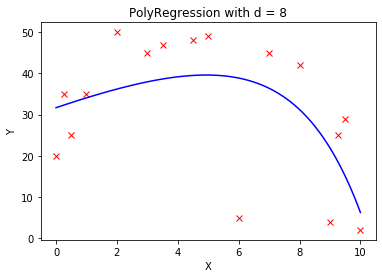

In [22]:
test_polyreg_univariate()